# Comprehensive Guide to Battery Discharge Modeling

## Introduction to Batteries

### What is a Battery?

A **battery** is an electrochemical energy storage device that converts chemical energy into electrical energy through spontaneous redox (reduction-oxidation) reactions. The term "battery" technically refers to multiple cells connected together, while a single unit is called a "cell," though the terms are often used interchangeably.

### Basic Components

Every battery consists of three fundamental components:

1. **Anode** - The negative electrode where oxidation occurs (electrons are released)
2. **Cathode** - The positive electrode where reduction occurs (electrons are consumed)
3. **Electrolyte** - The medium that allows ion transport between electrodes while preventing electron flow

---

## Battery Working Principles

### Electrochemical Fundamentals

The operation of a battery is governed by **Faraday's Laws of Electrolysis** and **thermodynamic principles**. The basic principle can be understood through the concept of electrochemical potential.

#### Gibbs Free Energy and Cell Voltage

The maximum work that can be extracted from a battery is determined by the Gibbs free energy change ($\Delta G$) of the overall reaction:

$$\Delta G = -nFE_{cell}$$

Where:
- $n$ = number of electrons transferred in the reaction
- $F$ = Faraday's constant (96,485 C/mol)
- $E_{cell}$ = cell voltage (V)

#### Nernst Equation

The actual cell voltage depends on the concentrations of reactants and products, described by the **Nernst equation**:

$$E_{cell} = E_{cell}^0 - \frac{RT}{nF}\ln\left(\frac{\text{[products]}}{\text{[reactants]}}\right)$$

Where:
- $E_{cell}^0$ = standard cell potential
- $R$ = universal gas constant (8.314 J/mol·K)
- $T$ = absolute temperature (K)

---

## Charging and Discharging Mechanisms
<div style=" align-items: center;">

  <img src="Resources\Charge-discharge.ppm" alt="Charge and Discharge process block diagram of a battery" width = "500" style="margin-right: 20px;"/>
</div>

### Discharging Process

During discharge, the battery delivers electrical energy to an external load. The process involves:

1. **At the Anode**: Oxidation reaction releases electrons
   $$\text{Anode: } A → A^{n+} + ne^-$$

2. **External Circuit**: Electrons flow from anode to cathode through the load

3. **At the Cathode**: Reduction reaction consumes electrons
   $$\text{Cathode: } B^{m+} + me^- → B$$

4. **Internal Circuit**: Ions move through electrolyte to maintain charge balance

### Charging Process

During charging, an external power source reverses the discharge reactions:

1. **At the Cathode** (now acting as anode): Oxidation occurs
2. **At the Anode** (now acting as cathode): Reduction occurs
3. **Energy Storage**: Chemical potential energy is restored

---

## Mathematical Modeling Framework

### Basic Electrical Relations

The fundamental relationship governing battery behavior starts with **Ohm's Law**:

$$V = IR$$

For a battery system, this becomes:

$$V_{terminal} = E_{cell} - I \cdot R_{internal}$$

Where:
- $V_{terminal}$ = terminal voltage (V)
- $E_{cell}$ = open-circuit voltage (V)
- $I$ = current (A)
- $R_{internal}$ = internal resistance (Ω)

### Capacity and State of Charge

**Battery capacity** ($Q_{total}$) is the total amount of charge a battery can deliver, typically expressed in ampere-hours (Ah):

$$Q_{total} = \int_0^{t_{end}} I(t) \, dt$$

**State of Charge** (SOC) represents the remaining capacity as a percentage:

$$SOC(t) = \frac{Q_{remaining}(t)}{Q_{total}} = \frac{Q_{total} - \int_0^t I(\tau) \, d\tau}{Q_{total}}$$

---

## Derivation from First Principles

### Starting Point: Conservation Laws

Our mathematical model begins with fundamental conservation principles:

#### 1. Conservation of Charge (Kirchhoff's Current Law)

The net current flowing into any node must equal zero:

$$\sum I_{in} = \sum I_{out}$$

For a battery: $$I_{anode} = I_{cathode} = I_{external}$$

#### 2. Conservation of Energy

Energy cannot be created or destroyed, only converted:

$$P_{chemical} = P_{electrical} + P_{losses}$$

$$\frac{dU_{chemical}}{dt} = I \cdot V_{terminal} + I^2 R_{internal}$$

Where $U_{chemical}$ is the stored chemical energy.

### Electrochemical Kinetics

#### Butler-Volmer Equation

The relationship between current and overpotential at each electrode follows the **Butler-Volmer equation**:

$$I = I_0 \left[ \exp\left(\frac{\alpha_a nF\eta}{RT}\right) - \exp\left(-\frac{\alpha_c nF\eta}{RT}\right) \right]$$

Where:
- $I_0$ = exchange current density
- $\alpha_a$, $\alpha_c$ = anodic and cathodic transfer coefficients
- $\eta$ = overpotential = $E - E_{eq}$

#### Simplified Linear Approximation

For small overpotentials ($|\eta| < 10 \text{ mV}$), the Butler-Volmer equation simplifies to:

$$I = I_0 \frac{nF\eta}{RT}$$

This gives us the **charge transfer resistance**:

$$R_{ct} = \frac{RT}{nFI_0}$$

### Mass Transport

#### Fick's Laws of Diffusion

The movement of ions in the electrolyte follows **Fick's first law**:

$$J = -D \frac{\partial C}{\partial x}$$

And **Fick's second law**:

$$\frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2}$$

Where:
- $J$ = flux (mol/m²·s)
- $D$ = diffusion coefficient (m²/s)
- $C$ = concentration (mol/m³)

#### Current-Concentration Relationship

The current is related to the flux by **Faraday's law**:

$$I = nFA J$$

Where $A$ is the electrode area.

### Combining Transport and Kinetics

The total overpotential consists of:

$$\eta_{total} = \eta_{kinetic} + \eta_{concentration} + \eta_{ohmic}$$

1. **Kinetic overpotential**: From Butler-Volmer equation
2. **Concentration overpotential**: From mass transport limitations
3. **Ohmic overpotential**: From electrolyte resistance

---

## Complete Discharge Model

### Fundamental Discharge Equation

Starting from the basic electrical relationship and incorporating electrochemical principles:

$$V_{terminal}(t) = E_{OCV}(SOC) - I(t) \cdot R_{internal}(SOC, T) - \eta_{concentration}(I, SOC)$$

#### Open Circuit Voltage Model

The open-circuit voltage (OCV) depends on the state of charge through the Nernst equation. For a simple linear approximation:

$$E_{OCV}(SOC) = E_{min} + (E_{max} - E_{min}) \cdot SOC$$

#### State of Charge Evolution

From conservation of charge:

$$\frac{dSOC}{dt} = -\frac{I(t)}{Q_{nominal}}$$

Integrating:

$$SOC(t) = SOC_0 - \frac{1}{Q_{nominal}}\int_0^t I(\tau) \, d\tau$$

#### Internal Resistance Model

The internal resistance varies with SOC and temperature:

$$R_{internal}(SOC, T) = R_0 \left(1 + k_1(1-SOC) + k_2 e^{-T/T_0}\right)$$

### Complete System of Equations

The complete discharge model consists of:

**State equation:**
$$\frac{dSOC}{dt} = -\frac{I}{Q_{nominal}}$$

**Output equation:**
$$V_{terminal} = E_{OCV}(SOC) - I \cdot R_{internal}(SOC, T)$$

**Capacity equation:**
$$Q_{remaining}(t) = Q_{nominal} \cdot SOC(t)$$

**Power equation:**
$$P_{delivered}(t) = V_{terminal}(t) \cdot I(t)$$

**Energy equation:**
$$E_{delivered}(t) = \int_0^t P_{delivered}(\tau) \, d\tau$$

---

## Assumptions and Limitations

### Key Assumptions Made

1. **Ideal Battery Behavior**
   - Uniform current distribution across electrodes
   - Homogeneous electrolyte properties
   - No side reactions or self-discharge

2. **Constant Parameters**
   - Temperature remains constant
   - Internal resistance is purely resistive (no capacitive effects)
   - Linear relationship between SOC and OCV

3. **Steady-State Conditions**
   - No transient effects considered
   - Instantaneous equilibration of concentrations
   - No mechanical stress or swelling effects

4. **Perfect Mixing**
   - Uniform concentration throughout electrolyte
   - No concentration gradients
   - Infinite mass transport rates

### Mathematical Simplifications

1. **Linear OCV-SOC Relationship**: Real batteries often show non-linear voltage curves
2. **Constant Internal Resistance**: Actually varies significantly with current, SOC, and aging
3. **No Thermal Effects**: Temperature significantly affects all battery parameters
4. **Single RC Model**: Real batteries exhibit multiple time constants

## Simplest Case for Mathematical Animation

For demonstration purposes, we implement the **simplest possible case** of the battery discharge model. This serves as the foundation for understanding more complex behaviors.

### Selected Simplifications for Animation Model

**1. Linear OCV-SOC Relationship:**

$$E_{OCV}(SOC) = E_{min} + (E_{max} - E_{min}) \cdot SOC$$

*Justification*: Provides clear, predictable voltage behavior that's easy to visualize and understand conceptually.

**2. Constant Internal Resistance:**
$$R_{internal} = R_0 = \text{constant}$$

*Justification*: Eliminates variable resistance effects, making the relationship between current and voltage drop purely linear and predictable.

**3. Constant Current Discharge:**
$I(t) = I_0 = \text{constant}$

*Justification*: Most common test condition and simplest scenario to analyze. Real applications often approximate constant current during steady loads.

**4. Room Temperature Operation:**
$T = 298K = \text{constant}$

*Justification*: Eliminates temperature dependencies, focusing on core electrochemical behavior.

**5. No Aging Effects:**
All parameters remain constant over the discharge cycle.

*Justification*: Focuses on fundamental discharge physics without long-term degradation complexity.

### Resulting Simplified Model

**Core Equations:**
```
dSOC/dt = -I₀/Q_nominal
V_terminal(t) = E_max - (E_max - E_min)·(1 - SOC(t)) - I₀·R₀
SOC(t) = SOC₀ - (I₀·t)/Q_nominal
```

**Key Chosen Parameters:**
- E_max = 4.2V (fully charged voltage)
- E_min = 3.0V (cutoff voltage)  
- Q_nominal = 2.5 Ah (battery capacity)
- R₀ = 0.1Ω (internal resistance)
- I₀ = 0.5A (discharge current)

This simplified model captures the essential physics while remaining mathematically tractable and visually clear for educational demonstration.

## Conclusion

This guide presents the fundamental approach to battery discharge modeling, starting from basic electrochemical principles and deriving the governing equations from first principles.

Theoretical discharge time: 5.0 hours


C:\Users\jerek\AppData\Local\Temp\ipykernel_26020\1907293622.py:297: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


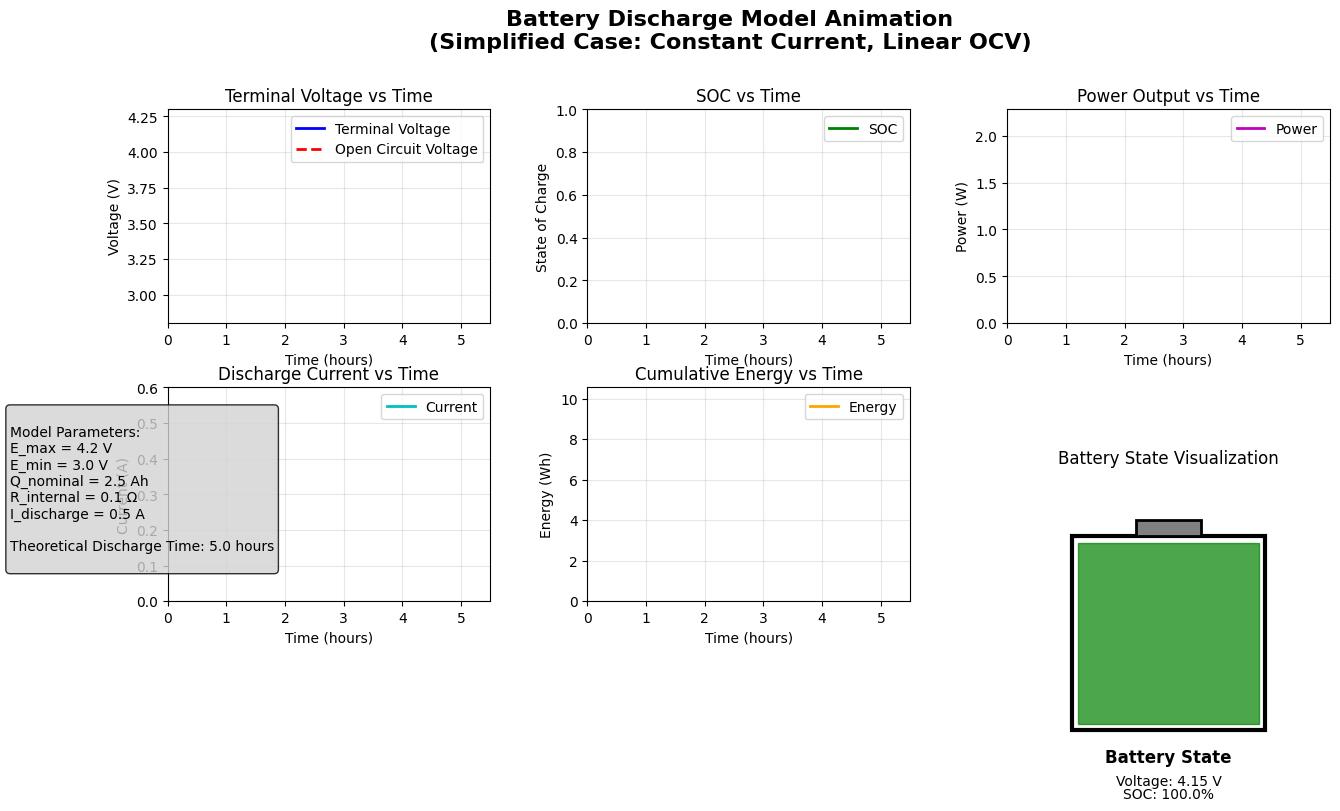


Final Values:
Final SOC: 0.0%
Final Terminal Voltage: 2.95 V
Total Energy Delivered: 9.59 Wh


In [1]:
"""
Battery Discharge Model Animation Script

This script animates the simplified battery discharge model derived from first principles.
It demonstrates the core relationships between voltage, current, state of charge, and power
during a constant current discharge process.

Model Assumptions (Simplest Case):
- Linear OCV-SOC relationship
- Constant internal resistance
- Constant current discharge
- Room temperature operation
- No aging effects

Required Libraries:
pip install matplotlib numpy
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

# =============================================================================
# BATTERY MODEL PARAMETERS (Simplified Case)
# =============================================================================

# Battery specifications (typical Li-ion values)
E_max = 4.2         # Maximum voltage (V) - fully charged
E_min = 3.0         # Minimum voltage (V) - discharge cutoff
Q_nominal = 2.5     # Nominal capacity (Ah)
R_internal = 0.1    # Internal resistance (Ohm) - constant
I_discharge = 0.5   # Discharge current (A) - constant

# Initial conditions
SOC_initial = 1.0   # Start at 100% state of charge
T_ambient = 298     # Room temperature (K)

# =============================================================================
# DERIVED PARAMETERS AND TIME SETUP
# =============================================================================

# Calculate theoretical discharge time (hours)
# At constant current: t_discharge = Q_nominal / I_discharge
discharge_time_hours = Q_nominal / I_discharge
print(f"Theoretical discharge time: {discharge_time_hours:.1f} hours")

# Time array for simulation (in hours)
t_max = discharge_time_hours * 1.1  # Add 10% margin
dt = 0.01  # Time step (hours)
time_array = np.arange(0, t_max, dt)

# =============================================================================
# MATHEMATICAL MODEL IMPLEMENTATION
# =============================================================================

def calculate_battery_parameters(time_hours, I_const, Q_nom, E_max, E_min, R_int, SOC_init):
    """
    Calculate battery parameters over time using the simplified discharge model.
    
    Core Equations:
    1. SOC(t) = SOC_0 - (I * t) / Q_nominal
    2. E_OCV(SOC) = E_min + (E_max - E_min) * SOC
    3. V_terminal(t) = E_OCV(SOC) - I * R_internal
    4. P_delivered(t) = V_terminal(t) * I
    
    Parameters:
    -----------
    time_hours : array, time in hours
    I_const : float, constant discharge current (A)
    Q_nom : float, nominal capacity (Ah)
    E_max, E_min : float, max and min voltages (V)
    R_int : float, internal resistance (Ohm)
    SOC_init : float, initial state of charge (0-1)
    
    Returns:
    --------
    dict with SOC, V_ocv, V_terminal, Power, Energy arrays
    """
    
    # State of Charge evolution (Equation 1)
    # dSOC/dt = -I/Q_nominal  =>  SOC(t) = SOC_0 - I*t/Q_nominal
    SOC = SOC_init - (I_const * time_hours) / Q_nom
    SOC = np.maximum(SOC, 0)  # Prevent negative SOC
    
    # Open Circuit Voltage (Equation 2)
    # Linear relationship between OCV and SOC
    V_ocv = E_min + (E_max - E_min) * SOC
    
    # Terminal Voltage (Equation 3)
    # V_terminal = V_ocv - I*R (Ohm's law for internal resistance)
    V_terminal = V_ocv - I_const * R_int
    
    # Power Delivered (Equation 4)
    # P = V * I (basic electrical power)
    Power = V_terminal * I_const
    
    # Energy Delivered (Integration of power)
    # E = ∫P dt (numerical integration using trapezoidal rule)
    Energy = np.zeros_like(time_hours)
    if len(time_hours) > 1:
        dt_hours = time_hours[1] - time_hours[0]
        Energy[1:] = np.cumsum(Power[1:] * dt_hours)
    
    # Current (constant in this model)
    Current = np.full_like(time_hours, I_const)
    
    return {
        'time': time_hours,
        'SOC': SOC,
        'V_ocv': V_ocv,
        'V_terminal': V_terminal,
        'Current': Current,
        'Power': Power,
        'Energy': Energy
    }

# Calculate all battery parameters
battery_data = calculate_battery_parameters(
    time_array, I_discharge, Q_nominal, E_max, E_min, R_internal, SOC_initial
)

# =============================================================================
# ANIMATION SETUP
# =============================================================================

# Create figure with subplots
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Battery Discharge Model Animation\n(Simplified Case: Constant Current, Linear OCV)', 
             fontsize=16, fontweight='bold')

# Define subplot layout (2 rows, 3 columns)
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])  # Voltage vs Time
ax2 = fig.add_subplot(gs[0, 1])  # SOC vs Time
ax3 = fig.add_subplot(gs[0, 2])  # Power vs Time
ax4 = fig.add_subplot(gs[1, 0])  # Current vs Time
ax5 = fig.add_subplot(gs[1, 1])  # Energy vs Time
ax6 = fig.add_subplot(gs[1:, 2])  # Battery Visualization

# =============================================================================
# SUBPLOT CONFIGURATION
# =============================================================================

# Voltage Plot (ax1)
ax1.set_xlim(0, t_max)
ax1.set_ylim(2.8, 4.3)
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Voltage (V)')
ax1.set_title('Terminal Voltage vs Time')
ax1.grid(True, alpha=0.3)
line1_terminal, = ax1.plot([], [], 'b-', linewidth=2, label='Terminal Voltage')
line1_ocv, = ax1.plot([], [], 'r--', linewidth=2, label='Open Circuit Voltage')
ax1.legend()

# SOC Plot (ax2)
ax2.set_xlim(0, t_max)
ax2.set_ylim(0, 1)
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('State of Charge')
ax2.set_title('SOC vs Time')
ax2.grid(True, alpha=0.3)
line2, = ax2.plot([], [], 'g-', linewidth=2, label='SOC')
ax2.legend()

# Power Plot (ax3)
ax3.set_xlim(0, t_max)
ax3.set_ylim(0, max(battery_data['Power']) * 1.1)
ax3.set_xlabel('Time (hours)')
ax3.set_ylabel('Power (W)')
ax3.set_title('Power Output vs Time')
ax3.grid(True, alpha=0.3)
line3, = ax3.plot([], [], 'm-', linewidth=2, label='Power')
ax3.legend()

# Current Plot (ax4)
ax4.set_xlim(0, t_max)
ax4.set_ylim(0, I_discharge * 1.2)
ax4.set_xlabel('Time (hours)')
ax4.set_ylabel('Current (A)')
ax4.set_title('Discharge Current vs Time')
ax4.grid(True, alpha=0.3)
line4, = ax4.plot([], [], 'c-', linewidth=2, label='Current')
ax4.legend()

# Energy Plot (ax5)
ax5.set_xlim(0, t_max)
ax5.set_ylim(0, max(battery_data['Energy']) * 1.1)
ax5.set_xlabel('Time (hours)')
ax5.set_ylabel('Energy (Wh)')
ax5.set_title('Cumulative Energy vs Time')
ax5.grid(True, alpha=0.3)
line5, = ax5.plot([], [], 'orange', linewidth=2, label='Energy')
ax5.legend()

# Battery Visualization (ax6)
ax6.set_xlim(0, 10)
ax6.set_ylim(0, 10)
ax6.set_aspect('equal')
ax6.set_title('Battery State Visualization')
ax6.axis('off')

# Battery outline
battery_outline = Rectangle((2, 2), 6, 6, linewidth=3, edgecolor='black', facecolor='none')
ax6.add_patch(battery_outline)

# Battery terminal
terminal = Rectangle((4, 8), 2, 0.5, linewidth=2, edgecolor='black', facecolor='gray')
ax6.add_patch(terminal)

# Battery charge indicator (will be animated)
charge_indicator = Rectangle((2.2, 2.2), 5.6, 0, linewidth=1, edgecolor='green', facecolor='green', alpha=0.7)
ax6.add_patch(charge_indicator)

# Add labels to battery visualization
ax6.text(5, 1, 'Battery State', ha='center', fontsize=12, fontweight='bold')
voltage_text = ax6.text(5, 0.3, '', ha='center', fontsize=10)
soc_text = ax6.text(5, -0.1, '', ha='center', fontsize=10)

# =============================================================================
# ANIMATION FUNCTION
# =============================================================================

def animate(frame):
    """
    Animation function called for each frame.
    Updates all plots and visualizations with current data.
    """
    # Current time index
    current_time = battery_data['time'][frame]
    
    # Update line plots (show data up to current frame)
    line1_terminal.set_data(battery_data['time'][:frame], battery_data['V_terminal'][:frame])
    line1_ocv.set_data(battery_data['time'][:frame], battery_data['V_ocv'][:frame])
    line2.set_data(battery_data['time'][:frame], battery_data['SOC'][:frame])
    line3.set_data(battery_data['time'][:frame], battery_data['Power'][:frame])
    line4.set_data(battery_data['time'][:frame], battery_data['Current'][:frame])
    line5.set_data(battery_data['time'][:frame], battery_data['Energy'][:frame])
    
    # Update battery visualization
    current_soc = battery_data['SOC'][frame]
    current_voltage = battery_data['V_terminal'][frame]
    
    # Update charge indicator height based on SOC
    charge_height = 5.6 * current_soc  # Scale to battery height
    charge_indicator.set_height(charge_height)
    
    # Change color based on charge level
    if current_soc > 0.5:
        charge_indicator.set_facecolor('green')
    elif current_soc > 0.2:
        charge_indicator.set_facecolor('orange')
    else:
        charge_indicator.set_facecolor('red')
    
    # Update text displays
    voltage_text.set_text(f'Voltage: {current_voltage:.2f} V')
    soc_text.set_text(f'SOC: {current_soc*100:.1f}%')
    
    return (line1_terminal, line1_ocv, line2, line3, line4, line5, 
            charge_indicator, voltage_text, soc_text)

# =============================================================================
# CREATE AND RUN ANIMATION
# =============================================================================

# Create animation object
# interval: time between frames in milliseconds
# frames: number of frames (data points)
anim = animation.FuncAnimation(fig, animate, frames=len(time_array), 
                             interval=50, blit=True, repeat=True)

# Add model parameters as text
param_text = f"""
Model Parameters:
E_max = {E_max} V
E_min = {E_min} V
Q_nominal = {Q_nominal} Ah
R_internal = {R_internal} Ω
I_discharge = {I_discharge} A

Theoretical Discharge Time: {discharge_time_hours:.1f} hours
"""

fig.text(0.02, 0.5, param_text, fontsize=10, verticalalignment='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))

# =============================================================================
# DISPLAY AND SAVE OPTIONS
# =============================================================================

if __name__ == "__main__":
    # Show the animation
    plt.tight_layout()
    plt.show()
    
    # Optional: Save animation as GIF (requires pillow: pip install pillow)
    # Uncomment the following lines to save the animation
    # print("Saving animation as GIF...")
    # anim.save('battery_discharge_animation.gif', writer='pillow', fps=20)
    # print("Animation saved as 'battery_discharge_animation.gif'")
    
    # Optional: Save animation as MP4 (requires ffmpeg)
    # anim.save('battery_discharge_animation.mp4', writer='ffmpeg', fps=20)
    
    # Print final values for verification
    print(f"\nFinal Values:")
    print(f"Final SOC: {battery_data['SOC'][-1]*100:.1f}%")
    print(f"Final Terminal Voltage: {battery_data['V_terminal'][-1]:.2f} V")
    print(f"Total Energy Delivered: {battery_data['Energy'][-1]:.2f} Wh")


### UNDERSTANDING THE ANIMATION:

1. VOLTAGE PLOT (Top Left):
   - Blue line: Terminal voltage (what you measure at battery terminals)
   - Red dashed line: Open circuit voltage (theoretical voltage without load)
   - The difference between them is the voltage drop across internal resistance

2. STATE OF CHARGE PLOT (Top Center):
   - Linear decrease due to constant current discharge
   - Slope = -I/Q_nominal (from dSOC/dt = -I/Q_nominal)

3. POWER PLOT (Top Right):
   - Decreases over time as terminal voltage decreases
   - P = V_terminal * I (constant current, decreasing voltage)

4. CURRENT PLOT (Bottom Left):
   - Constant horizontal line (our simplifying assumption)
   - In reality, current might vary with load demands

5. ENERGY PLOT (Bottom Center):
   - Cumulative energy delivered (integral of power over time)
   - Shows total work done by the battery

6. BATTERY VISUALIZATION (Right):
   - Green indicator shows remaining charge level
   - Color changes: Green (>50%) → Orange (20-50%) → Red (<20%)
   - Real-time voltage and SOC values displayed

KEY EQUATIONS IN ACTION:
- SOC(t) = SOC_0 - (I*t)/Q_nominal
- V_terminal = E_OCV(SOC) - I*R_internal  
- E_OCV = E_min + (E_max - E_min)*SOC
- P = V_terminal * I

### Troubleshooting
- In case the animation does not run, run the above cell in a dedicated python script instead of the notebook.
- ensure matplotlib and numpy are installed in your python environment.
- If you encounter any issues, please refer to the troubleshooting section in the documentation or seek help from the community forums.
- I hope this guide helps you understand the mathematical modeling of battery discharge.

